# Exercise - 1:
1. Read and display the image.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

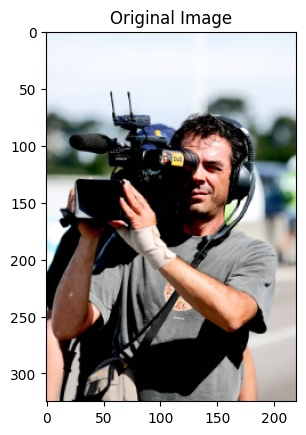

In [4]:
#Loading the image
image_path = "/content/drive/MyDrive/AI & ML/Week One/camera_man.jpg"
image = Image.open(image_path)

#Displaying image using Pillow
image.show()

#Displaying image using Matplotlib
plt.imshow(image)
plt.title("Original Image")
plt.show()


2. Display only the top left corner of 100x100 pixels.

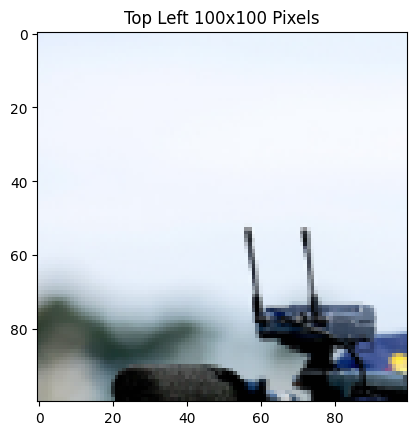

In [5]:
#Converting image to NumPy array
image_array = np.array(image)

#Extracting the top-left 100x100 pixels
top_left_corner = image_array[:100, :100]  # Slicing first 100 rows and first 100 columns

#Displaying the extracted portion
plt.imshow(top_left_corner)

plt.title("Top Left 100x100 Pixels")
plt.show()

3. Show the three color channels (R, G, B).

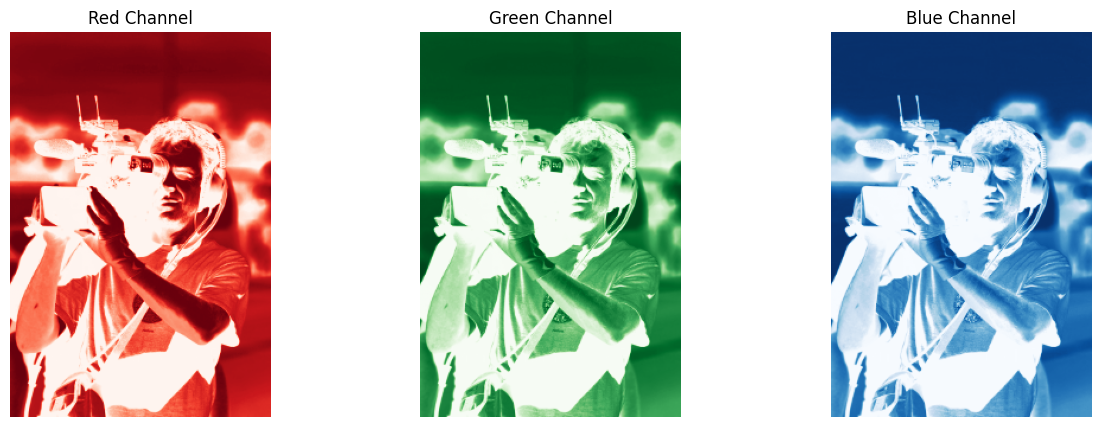

In [11]:
#Extracting the R, G, B channels
red_channel = image_array[:, :, 0]   #Red channel
green_channel = image_array[:, :, 1] #Green channel
blue_channel = image_array[:, :, 2]  #Blue channel


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title("Red Channel")
axes[0].axis("off")

axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title("Green Channel")
axes[1].axis("off")

axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title("Blue Channel")
axes[2].axis("off")

plt.show()


4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

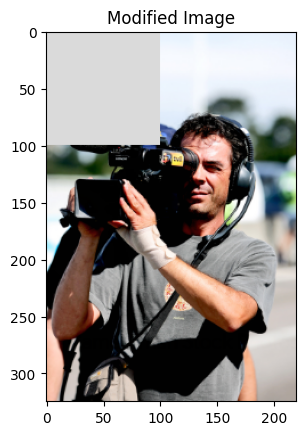

In [14]:
image_array[:100, :100] = 210
modified_image = Image.fromarray(image_array)
plt.imshow(modified_image)
plt.title("Modified Image")
plt.show()

# Exercise - 2:
1. Load and display a grayscale image.

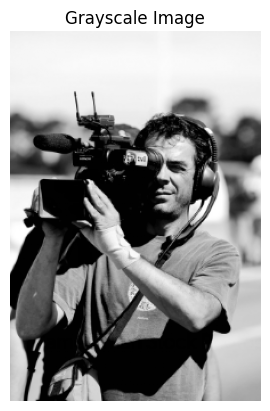

In [20]:
image_gray = image.convert("L")
plt.imshow(image_gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()

2. Extract and display the middle section of the image (150 pixels).

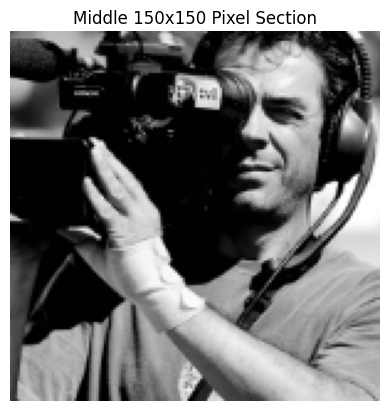

In [22]:
#converting grayscale image to NumPy array
image_array = np.array(image_gray)

#defining image dimensions
height, width = image_array.shape

#defining cropping boundaries
mid_x, mid_y = width // 2, height // 2  # Find center coordinates
crop_size = 150  # Size of the middle section

#extracting 150-pixel section around the center
start_x, end_x = mid_x - crop_size // 2, mid_x + crop_size // 2
start_y, end_y = mid_y - crop_size // 2, mid_y + crop_size // 2

cropped_section = image_array[start_y:end_y, start_x:end_x]


plt.imshow(cropped_section, cmap="gray")
plt.axis("off")
plt.title("Middle 150x150 Pixel Section")
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

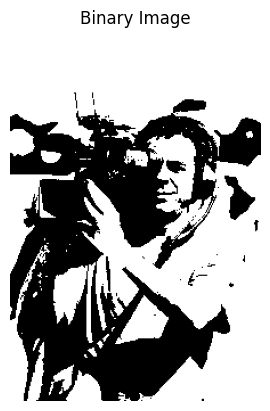

In [25]:
#applying threshold: Values below 100 → 0, Values 100+ → 255
binary_image = np.where(image_array < 100, 0, 255)

plt.imshow(binary_image, cmap="gray")
plt.axis("off")
plt.title("Binary Image")
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.

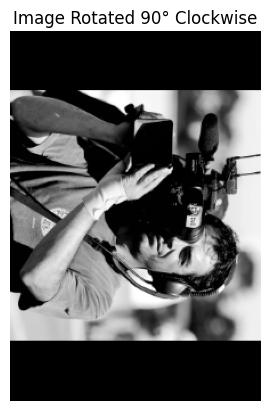

In [28]:
#rotating image 90 degrees clockwise using Pillow
rotated_image = image_grey.rotate(-90)  #negative for clockwise rotation
plt.imshow(rotated_image, cmap="gray")
plt.axis("off")
plt.title("Image Rotated 90° Clockwise")
plt.show()


5. Convert the grayscale image to an RGB image.

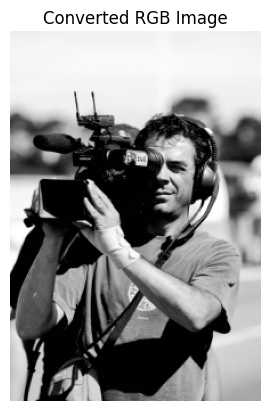

RGB


In [33]:
rgb_image = image_gray.convert("RGB")  # Convert grayscale to RGB
plt.imshow(rgb_image)
plt.title("Converted RGB Image")
plt.axis("off")
plt.show()
print(rgb_image.mode)

#3 Image Compression and Decompression using PCA.
1. Load and Prepare Data:

In [34]:
image_path = "/content/drive/MyDrive/AI & ML/Week One/lenna_image.png"
image = Image.open(image_path)

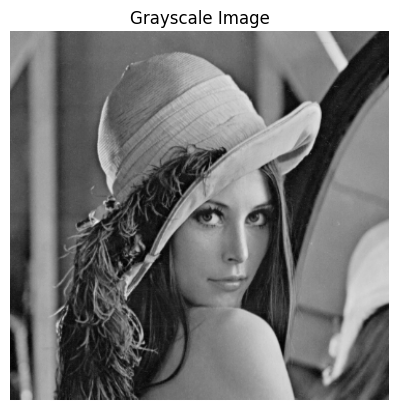

Mean Pixel Value: 123.22885000994934
Covariance Matrix Shape: (366, 366)


In [39]:
image = Image.open(image_path).convert("L")
image_array = np.array(image)

#standardizing the data (centring)
mean_value = np.mean(image_array)
standardized_image = image_array - mean_value

#computing the covariance matrix
cov_matrix = np.cov(standardized_image, rowvar=False)  #covariance

plt.imshow(image_array, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()

print("Mean Pixel Value:", mean_value)
print("Covariance Matrix Shape:", cov_matrix.shape)

2. Eigen Decomposition and Identifying Principal Components:

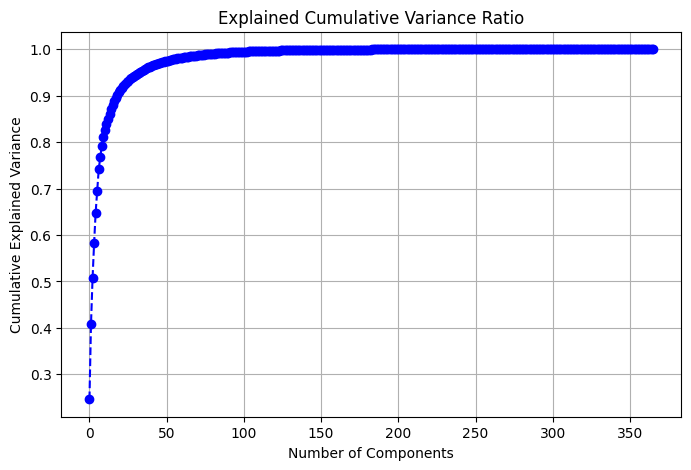

Eigenvalues Shape: (366,)
Eigenvectors Shape: (366, 366)
Selected Top 20 Principal Components Shape: (366, 20)


In [40]:
#computing eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

#sorting eigenvalues in descending Order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

#plotting cumulative sum of variance (for PCA Component Selection)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Cumulative Variance Ratio")
plt.grid(True)
plt.show()

K = 20
principal_components = eigenvectors[:, :K]


print("Eigenvalues Shape:", eigenvalues.shape)
print("Eigenvectors Shape:", eigenvectors.shape)
print(f"Selected Top {K} Principal Components Shape:", principal_components.shape)


3. Reconstruction and Experiment:

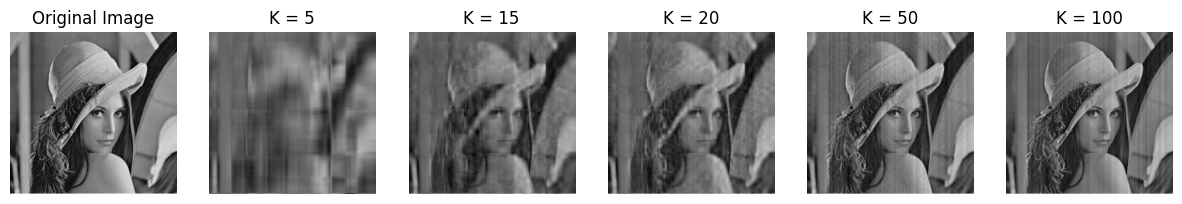

In [45]:

def pca_compression(image_data, eigenvectors, k):
    top_k_eigenvectors = eigenvectors[:, :k]
    compressed_data = np.dot(image_data, top_k_eigenvectors)
    reconstructed_data = np.dot(compressed_data, top_k_eigenvectors.T)
    return reconstructed_data


K_values = [5,15, 20, 50, 100]

fig, axes = plt.subplots(1, 6, figsize=(15, 5))

axes[0].imshow(image_array, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

for i, K in enumerate(K_values):
    reconstructed = pca_compression(standardized_image, eigenvectors, K) + mean_value
    axes[i + 1].imshow(reconstructed, cmap="gray")
    axes[i + 1].set_title(f"K = {K}")
    axes[i + 1].axis("off")

plt.show()
